In [1]:
#library imports
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import re
import spacy
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error

In [6]:
food = pd.read_csv("food.csv")
print(food.shape)
food.head()
count_nan = food['recipe'].isnull().sum()
print(count_nan)

(5997, 2)
0


In [7]:
import spacy.cli 
spacy.cli.download("en_core_web_md")
#tokenization



tok = spacy.load('en_core_web_md')
def tokenize (text):
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    regex = re.compile('[' + re.escape(string.punctuation) + '\\r\\t\\n]') # remove punctuation 
    nopunct = regex.sub(" ", text.lower())
    return [token.text for token in tok.tokenizer(nopunct)]

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [8]:
counts = Counter()
for index, row in food.iterrows():
    print(row)
    counts.update(tokenize(row['recipe']))
    



category                                                    0
recipe      make a choice and proceed with recipe dependin...
Name: 0, dtype: object
category                                                    0
recipe      mix all ingredients& boil for 2 1 / 2 hours , ...
Name: 1, dtype: object
category                                                    0
recipe      toast the fennel seeds and lightly crush them ...
Name: 2, dtype: object
category                                                    0
recipe      drain green chiles sprinkle cornstarch on shee...
Name: 3, dtype: object
category                                                    0
recipe      heat the oil or margarine in a soup pot and ad...
Name: 4, dtype: object
category                                                    0
recipe      in a 3 qt saucepan over medium high heat , sau...
Name: 5, dtype: object
category                                                    0
recipe      mix the spices together and store in an airt

Name: 226, dtype: object
category                                                    0
recipe      heat oven to 350 in large mixing bowl , combin...
Name: 227, dtype: object
category                                                    0
recipe      slice lemons and place in a large bowl add sug...
Name: 228, dtype: object
category                                                    0
recipe      spray grill rack with nonstick spray and prepa...
Name: 229, dtype: object
category                                                    0
recipe      in a bowl , combine all ingredients but the to...
Name: 230, dtype: object
category                                                    0
recipe      cook pasta add zucchini during last 2 minutes ...
Name: 231, dtype: object
category                                                    0
recipe      slice the eggs in half from top to bottom scoo...
Name: 232, dtype: object
category                                                    0
recipe      put the

Name: 510, dtype: object
category                                                    0
recipe      in olive oil , cook onion , garlic , jalapenos...
Name: 511, dtype: object
category                                                    0
recipe      heat 1 tbsp of the oil in large pan add the cu...
Name: 512, dtype: object
category                                                    0
recipe      sprinkle the garlic with salt and crush add su...
Name: 513, dtype: object
category                                                    0
recipe      mix together all the ingredients , seasoning t...
Name: 514, dtype: object
category                                                    0
recipe      beat eggs until thick stir in potatoes and res...
Name: 515, dtype: object
category                                                    0
recipe      preheat oven to 200c / 400f combine and simmer...
Name: 516, dtype: object
category                                                    0
recipe      sarsa :

Name: 778, dtype: object
category                                                    0
recipe      combine ingredients in blender and blend until...
Name: 779, dtype: object
category                                                    0
recipe      preheat oven to 350 tear bread into chunks bea...
Name: 780, dtype: object
category                                                    0
recipe      combine sugar and water in a small saucepan br...
Name: 781, dtype: object
category                                                    0
recipe      in a pitcher stir together orange juice and li...
Name: 782, dtype: object
category                                                    0
recipe      put ingredients in blender , in the order list...
Name: 783, dtype: object
category                                                    0
recipe      preheat oven to 350f spray 13x9" baking dish ,...
Name: 784, dtype: object
category                                                    0
recipe      pour ch

Name: 1067, dtype: object
category                                                    0
recipe      combine first seven ingredients in a food proc...
Name: 1068, dtype: object
category                                                    0
recipe      preheat oven to 350f peel , quarter , core and...
Name: 1069, dtype: object
category                                                    0
recipe      combine cranberry sauce , celery , apples , an...
Name: 1070, dtype: object
category                                                    0
recipe      measure flour , sugar , baking powder , soda ,...
Name: 1071, dtype: object
category                                                    0
recipe      cut acorn squash in half lengthwise and spoon ...
Name: 1072, dtype: object
category                                                    0
recipe      toast bread lightly first spread bread slices ...
Name: 1073, dtype: object
category                                                    0
recipe      

Name: 1364, dtype: object
category                                                    0
recipe      place the peppers , scallions , parsley , cila...
Name: 1365, dtype: object
category                                                    0
recipe      in a blender combine the parsley , cilantro , ...
Name: 1366, dtype: object
category                                                    0
recipe      heat the olive oil in a large heavy saucepan o...
Name: 1367, dtype: object
category                                                    0
recipe      preheat your oven to 425f place one 10-inch ca...
Name: 1368, dtype: object
category                                                    0
recipe      spread one side of each slice of bread with 1 ...
Name: 1369, dtype: object
category                                                    0
recipe      if you have time , put the milk in a heavy pan...
Name: 1370, dtype: object
category                                                    0
recipe      

Name: 1654, dtype: object
category                                                    0
recipe      preheat oven to 430 f wash asparagus , trim of...
Name: 1655, dtype: object
category                                                    0
recipe      set oven to 375f prepare an ungreased a 15 x 1...
Name: 1656, dtype: object
category                                                    0
recipe      to prepare asparagus , snap off the fibrous en...
Name: 1657, dtype: object
category                                                    0
recipe      in a skillet or wok , stir-fry asparagus in oi...
Name: 1658, dtype: object
category                                                    0
recipe      preheat oven 350f whisk flour and 1 / 2 cup mi...
Name: 1659, dtype: object
category                                                    0
recipe      toss asparagus with 1 tbs of the oil in a baki...
Name: 1660, dtype: object
category                                                    0
recipe      

Name: 1955, dtype: object
category                                                    0
recipe      wash the eggplants , and pierce the skin with ...
Name: 1956, dtype: object
category                                                    0
recipe      preheat oven to 450 degrees f cut eggplant in ...
Name: 1957, dtype: object
category                                                    0
recipe      prepare potato dumplings: in a large bowl , ad...
Name: 1958, dtype: object
category                                                    0
recipe      combine sugars and syrup and heat to boiling j...
Name: 1959, dtype: object
category                                                    0
recipe      heat a large pot of water to a boil , salt wat...
Name: 1960, dtype: object
category                                                    0
recipe      sandwich prep: heat griddle or other skillet t...
Name: 1961, dtype: object
category                                                    0
recipe      

Name: 2250, dtype: object
category                                                    0
recipe      leave the tofu in its packaging and freeze for...
Name: 2251, dtype: object
category                                                    0
recipe      preheat the oven to 375f in a shallow baking d...
Name: 2252, dtype: object
category                                                    0
recipe      mix black beans with cumin , coriander , chili...
Name: 2253, dtype: object
category                                                    0
recipe      preheat oven to 350 degrees in an ovenproof sa...
Name: 2254, dtype: object
category                                                    0
recipe      preheat oven to 425 heat a medium skillet over...
Name: 2255, dtype: object
category                                                    0
recipe      wash and slice mushrooms melt butter , saute o...
Name: 2256, dtype: object
category                                                    0
recipe      

Name: 2555, dtype: object
category                                                    0
recipe      combine cake ingredients following cake mix di...
Name: 2556, dtype: object
category                                                    0
recipe      bring the water , butter and milk to a boil ad...
Name: 2557, dtype: object
category                                                    0
recipe      spray 9" square baking pan with non-stick spra...
Name: 2558, dtype: object
category                                                    0
recipe      preheat the broiler oven spread each piece of ...
Name: 2559, dtype: object
category                                                    0
recipe      in a bowl , combine oats and boiling water let...
Name: 2560, dtype: object
category                                                    0
recipe      heat milk if desired if unsure , consider whet...
Name: 2561, dtype: object
category                                                    0
recipe      

Name: 2852, dtype: object
category                                                    0
recipe      rinse beans in a colander under running water ...
Name: 2853, dtype: object
category                                                    0
recipe      heat oil in a saucepan on a medium flame and a...
Name: 2854, dtype: object
category                                                    0
recipe      hand method: prepare pan by greasing according...
Name: 2855, dtype: object
category                                                    0
recipe      preheat oven to 350f prepare 8 x 4 inch loaf p...
Name: 2856, dtype: object
category                                                    0
recipe      spray non-stick frying generously with cooking...
Name: 2857, dtype: object
category                                                    0
recipe      place the buckwheat flour , rice flour , arrow...
Name: 2858, dtype: object
category                                                    0
recipe      

Name: 3137, dtype: object
category                                                    1
recipe      arrange the cucumbers , tomatoes , onion , red...
Name: 3138, dtype: object
category                                                    1
recipe      put fish into a medium sized bowl cover with b...
Name: 3139, dtype: object
category                                                    1
recipe      prepare potatoes per package instructions add ...
Name: 3140, dtype: object
category                                                    1
recipe      cut each chop into three strips lengthwise wit...
Name: 3141, dtype: object
category                                                    1
recipe      in large non-stick pan , cook veggies on mediu...
Name: 3142, dtype: object
category                                                    1
recipe      slice the chicken and place in a bowl peel and...
Name: 3143, dtype: object
category                                                    1
recipe      

Name: 3447, dtype: object
category                                                    1
recipe      meatballs---beat the egg in a medium bowl add ...
Name: 3448, dtype: object
category                                                    1
recipe      make sure the oven keeps the right temperature...
Name: 3449, dtype: object
category                                                    1
recipe      mix all ingredients in a blender until well bl...
Name: 3450, dtype: object
category                                                    1
recipe      bring water to boil in saucepan add salt and c...
Name: 3451, dtype: object
category                                                    1
recipe      cut round steak into 6 serving size pieces on ...
Name: 3452, dtype: object
category                                                    1
recipe      preheat oven to 350 mix apples with brown suga...
Name: 3453, dtype: object
category                                                    1
recipe      

Name: 3737, dtype: object
category                                                    1
recipe      dissolve yeast in 2 / 3 c water while your mil...
Name: 3738, dtype: object
category                                                    1
recipe      microwave buttermilk for 30secs to a minute so...
Name: 3739, dtype: object
category                                                    1
recipe      follow directions for your machine for a 2-pou...
Name: 3740, dtype: object
category                                                    1
recipe      place beaten egg , water , sugar and oil in br...
Name: 3741, dtype: object
category                                                    1
recipe      whisk together the flour , yeast , salt and vi...
Name: 3742, dtype: object
category                                                    1
recipe      combine yeast and warm water and let sit for a...
Name: 3743, dtype: object
category                                                    1
recipe      

Name: 4040, dtype: object
category                                                    1
recipe      in large bowl , mix together butter , sour cre...
Name: 4041, dtype: object
category                                                    1
recipe      preheat oven to 375 degrees mix butter , sour ...
Name: 4042, dtype: object
category                                                    1
recipe      mix sour cream , sugar and coconut well and re...
Name: 4043, dtype: object
category                                                    1
recipe      partially freeze beef and slice thinly against...
Name: 4044, dtype: object
category                                                    1
recipe      combine sugar and warm water and then add dry ...
Name: 4045, dtype: object
category                                                    1
recipe      peel and chop oranges into bite size pieces co...
Name: 4046, dtype: object
category                                                    1
recipe      

Name: 4336, dtype: object
category                                                    1
recipe      drain the beans pour everything except for the...
Name: 4337, dtype: object
category                                                    1
recipe      put all the above in the blender and blend til...
Name: 4338, dtype: object
category                                                    1
recipe      put grill on at hottest temperature heat up le...
Name: 4339, dtype: object
category                                                    1
recipe      wash and cube the potato put the extra virgin ...
Name: 4340, dtype: object
category                                                    1
recipe      in a bowl , mix all the vegetables add lemon j...
Name: 4341, dtype: object
category                                                    1
recipe      heat the olive oil in a frying pan and stir fr...
Name: 4342, dtype: object
category                                                    1
recipe      

Name: 4636, dtype: object
category                                                    1
recipe      please preheat oven to 325f line muffin tin wi...
Name: 4637, dtype: object
category                                                    1
recipe      make the cake per the boxes directions and bak...
Name: 4638, dtype: object
category                                                    1
recipe      pour milk , melted margarine , and vanilla int...
Name: 4639, dtype: object
category                                                    1
recipe      place the ingredients in a shaker with ice sha...
Name: 4640, dtype: object
category                                                    1
recipe      cook the spaghetti in boiling , salted water u...
Name: 4641, dtype: object
category                                                    1
recipe      preheat oven to 160f mix together the flour , ...
Name: 4642, dtype: object
category                                                    1
recipe      

Name: 4938, dtype: object
category                                                    1
recipe      1 melt butter , velveeta , and half & half in ...
Name: 4939, dtype: object
category                                                    1
recipe      add ingredients and shake over ice the taste i...
Name: 4940, dtype: object
category                                                    1
recipe      combine first 6 ingredients in medium bowl whi...
Name: 4941, dtype: object
category                                                    1
recipe      combine rum , vodka & schnapps in a shaker tha...
Name: 4942, dtype: object
category                                                    1
recipe      preheat oven to 375 degrees farenheit sprinkle...
Name: 4943, dtype: object
category                                                    1
recipe      preheat oven to 300f spray large baking sheet ...
Name: 4944, dtype: object
category                                                    1
recipe      

Name: 5250, dtype: object
category                                                    1
recipe      put 2 1 / 2 cups milk in a saucepan , add suga...
Name: 5251, dtype: object
category                                                    1
recipe      for the salsa: in a medium bowl , combine the ...
Name: 5252, dtype: object
category                                                    1
recipe      in a large bowl , combine chicken pieces , gar...
Name: 5253, dtype: object
category                                                    1
recipe      combine flour , baking powder , salt and bakin...
Name: 5254, dtype: object
category                                                    1
recipe      in a medium bowl , whisk together the creamy p...
Name: 5255, dtype: object
category                                                    1
recipe      cut the beef into 1 / 2 inch cubes chop the on...
Name: 5256, dtype: object
category                                                    1
recipe      

Name: 5549, dtype: object
category                                                    1
recipe      saute bacon until crisp remove and set aside a...
Name: 5550, dtype: object
category                                                    1
recipe      combine soya sauce , wine , oil and ginger or ...
Name: 5551, dtype: object
category                                                    1
recipe      in large bowl , combine beef , oats , sour cre...
Name: 5552, dtype: object
category                                                    1
recipe      in a bowl , combine beef , onion , garlic , ri...
Name: 5553, dtype: object
category                                                    1
recipe      in a large bowl , mix eggs , cracker crumbs , ...
Name: 5554, dtype: object
category                                                    1
recipe      combine meatball ingredients in a bowl shape m...
Name: 5555, dtype: object
category                                                    1
recipe      

Name: 5842, dtype: object
category                                                    1
recipe      heat oven to 350 deg f / 180 deg celsius use y...
Name: 5843, dtype: object
category                                                    1
recipe      cook first 3 ingredients on the stove , stirri...
Name: 5844, dtype: object
category                                                    1
recipe      preheat oven to 350f cook pasta as directed on...
Name: 5845, dtype: object
category                                                    1
recipe      preheat oven to 350 degrees f in large bowl , ...
Name: 5846, dtype: object
category                                                    1
recipe      bring milk and water just to boil in large sau...
Name: 5847, dtype: object
category                                                    1
recipe      preheat oven to 400 degrees remove ribs and se...
Name: 5848, dtype: object
category                                                    1
recipe      

In [9]:
#creating vocabulary
vocab2index = {"":0, "UNK":1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

In [10]:
def encode_sentence(text, vocab2index, N=70):
    tokenized = tokenize(text)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in tokenized])
    length = min(N, len(enc1))
    encoded[:length] = enc1[:length]
    return encoded, length

In [11]:
food['encoded'] = food['recipe'].apply(lambda x: np.array(encode_sentence(x,vocab2index )))
food.head()

<ipython-input-11-895317697c9e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  food['encoded'] = food['recipe'].apply(lambda x: np.array(encode_sentence(x,vocab2index )))


,category,recipe,encoded
0,0,make a choice and proceed with recipe dependin...,"[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, ..."
1,0,"mix all ingredients& boil for 2 1 / 2 hours , ...","[[35, 82, 83, 84, 85, 22, 86, 87, 14, 86, 88, ..."
2,0,toast the fennel seeds and lightly crush them ...,"[[121, 58, 122, 21, 5, 123, 124, 125, 126, 82,..."
3,0,drain green chiles sprinkle cornstarch on shee...,"[[136, 137, 138, 139, 140, 10, 141, 142, 143, ..."
4,0,heat the oil or margarine in a soup pot and ad...,"[[186, 58, 26, 18, 187, 105, 3, 188, 189, 5, 1..."


In [20]:
X = list(food['encoded'])
y = list(food['category'])
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [23]:
class RecipeDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx][0].astype(np.int32)), self.y[idx], self.X[idx][1]

In [66]:
train_ds = RecipeDataset(X_train, y_train)
valid_ds = RecipeDataset(X_valid, y_valid)

In [115]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.ion()


def validation_metrics (model, valid_dl,iscm=False):
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    cms=np.zeros_like(2)
    y_expected_all=torch.tensor([],dtype=torch.int32)
    y_predicted_all=torch.tensor([],dtype=torch.int32)
    with torch.no_grad():
        for x, y, l in valid_dl:
            x = x.long()
            y = y.long()
            y_hat = model(x, l)
            loss = F.cross_entropy(y_hat, y)
            pred = torch.max(y_hat, 1)[1]

            y_expected_all=torch.cat((y_expected_all,y),dim=0)
            y_predicted_all=torch.cat((y_predicted_all,pred),dim=0)


            cm = confusion_matrix(y,pred,labels=[0,1])
            cms=cm+cms
            #print(cms)

            correct += (pred == y).float().sum()
            total += y.shape[0]
            sum_loss += loss.item()*y.shape[0]
            sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
    
    if iscm:
        print("################Confusion Matrix####################")
        disp = ConfusionMatrixDisplay(confusion_matrix=cms,display_labels=[0,1])
        disp.plot()
        plt.show()
        #importing accuracy_score, precision_score, recall_score, f1_score
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
        print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_expected_all, y_predicted_all)))

        print('Micro Precision: {:.2f}'.format(precision_score(y_expected_all, y_predicted_all, average='micro')))
        print('Micro Recall: {:.2f}'.format(recall_score(y_expected_all, y_predicted_all, average='micro')))
        print('Micro F1-score: {:.2f}\n'.format(f1_score(y_expected_all, y_predicted_all, average='micro')))

        print('Macro Precision: {:.2f}'.format(precision_score(y_expected_all, y_predicted_all, average='macro')))
        print('Macro Recall: {:.2f}'.format(recall_score(y_expected_all, y_predicted_all, average='macro')))
        print('Macro F1-score: {:.2f}\n'.format(f1_score(y_expected_all, y_predicted_all, average='macro')))

        print('Weighted Precision: {:.2f}'.format(precision_score(y_expected_all, y_predicted_all, average='weighted')))
        print('Weighted Recall: {:.2f}'.format(recall_score(y_expected_all, y_predicted_all, average='weighted')))
        print('Weighted F1-score: {:.2f}'.format(f1_score(y_expected_all, y_predicted_all, average='weighted')))

        from sklearn.metrics import classification_report
        print('\nClassification Report\n')
        print(classification_report(y_expected_all, y_predicted_all, target_names=['0','1']))
    return sum_loss/total, correct/total, sum_rmse/total




def train_model(model, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)

    best_acc=0.0
    
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            y_pred = model(x, l)
            optimizer.zero_grad()
            loss = F.cross_entropy(y_pred, y)
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc, val_rmse = validation_metrics(model, val_dl,iscm=False)
        if i % 5 == 1:
            print("train loss %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (sum_loss/total, val_loss, val_acc, val_rmse))
        if val_acc > best_acc:
            best_acc = val_acc
            print("best accuracy so far:\n")
            val_loss, val_acc, val_rmse = validation_metrics(model, val_dl,iscm=True)
        



In [70]:
batch_size = 5000
vocab_size = len(words)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(valid_ds, batch_size=batch_size)

In [71]:
class LSTM_variable_input(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) :
        super().__init__()
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(0.3)
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 5)
        
    def forward(self, x, s):
        x = self.embeddings(x)
        x = self.dropout(x)
        x_pack = pack_padded_sequence(x, s, batch_first=True, enforce_sorted=False)
        out_pack, (ht, ct) = self.lstm(x_pack)
        out = self.linear(ht[-1])
        return out

In [72]:
model = LSTM_variable_input(vocab_size, 50, 50)

best accuracy so far:

################Confusion Matrix####################


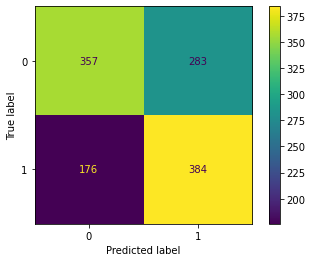


Accuracy: 0.62

Micro Precision: 0.62
Micro Recall: 0.62
Micro F1-score: 0.62

Macro Precision: 0.62
Macro Recall: 0.62
Macro F1-score: 0.62

Weighted Precision: 0.63
Weighted Recall: 0.62
Weighted F1-score: 0.62

Classification Report

              precision    recall  f1-score   support

           0       0.67      0.56      0.61       640
           1       0.58      0.69      0.63       560

    accuracy                           0.62      1200
   macro avg       0.62      0.62      0.62      1200
weighted avg       0.63      0.62      0.62      1200

train loss 0.166, val loss 1.509, val accuracy 0.639, and val rmse 0.601
best accuracy so far:

################Confusion Matrix####################


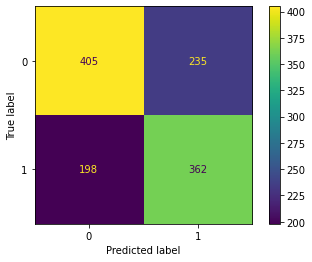


Accuracy: 0.64

Micro Precision: 0.64
Micro Recall: 0.64
Micro F1-score: 0.64

Macro Precision: 0.64
Macro Recall: 0.64
Macro F1-score: 0.64

Weighted Precision: 0.64
Weighted Recall: 0.64
Weighted F1-score: 0.64

Classification Report

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       640
           1       0.61      0.65      0.63       560

    accuracy                           0.64      1200
   macro avg       0.64      0.64      0.64      1200
weighted avg       0.64      0.64      0.64      1200

best accuracy so far:

################Confusion Matrix####################


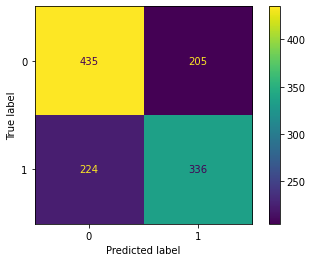


Accuracy: 0.64

Micro Precision: 0.64
Micro Recall: 0.64
Micro F1-score: 0.64

Macro Precision: 0.64
Macro Recall: 0.64
Macro F1-score: 0.64

Weighted Precision: 0.64
Weighted Recall: 0.64
Weighted F1-score: 0.64

Classification Report

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       640
           1       0.62      0.60      0.61       560

    accuracy                           0.64      1200
   macro avg       0.64      0.64      0.64      1200
weighted avg       0.64      0.64      0.64      1200

train loss 0.163, val loss 1.466, val accuracy 0.631, and val rmse 0.608
best accuracy so far:

################Confusion Matrix####################


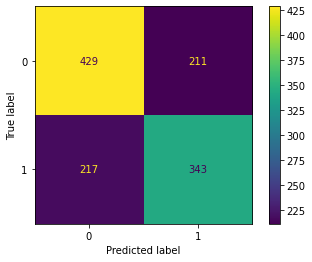


Accuracy: 0.64

Micro Precision: 0.64
Micro Recall: 0.64
Micro F1-score: 0.64

Macro Precision: 0.64
Macro Recall: 0.64
Macro F1-score: 0.64

Weighted Precision: 0.64
Weighted Recall: 0.64
Weighted F1-score: 0.64

Classification Report

              precision    recall  f1-score   support

           0       0.66      0.67      0.67       640
           1       0.62      0.61      0.62       560

    accuracy                           0.64      1200
   macro avg       0.64      0.64      0.64      1200
weighted avg       0.64      0.64      0.64      1200

train loss 0.166, val loss 1.488, val accuracy 0.642, and val rmse 0.598
best accuracy so far:

################Confusion Matrix####################


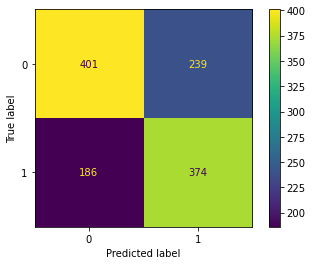


Accuracy: 0.65

Micro Precision: 0.65
Micro Recall: 0.65
Micro F1-score: 0.65

Macro Precision: 0.65
Macro Recall: 0.65
Macro F1-score: 0.65

Weighted Precision: 0.65
Weighted Recall: 0.65
Weighted F1-score: 0.65

Classification Report

              precision    recall  f1-score   support

           0       0.68      0.63      0.65       640
           1       0.61      0.67      0.64       560

    accuracy                           0.65      1200
   macro avg       0.65      0.65      0.65      1200
weighted avg       0.65      0.65      0.65      1200

best accuracy so far:

################Confusion Matrix####################


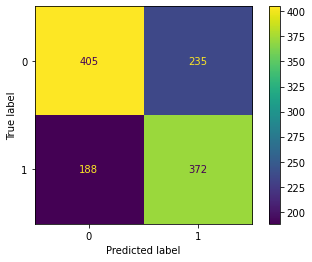


Accuracy: 0.65

Micro Precision: 0.65
Micro Recall: 0.65
Micro F1-score: 0.65

Macro Precision: 0.65
Macro Recall: 0.65
Macro F1-score: 0.65

Weighted Precision: 0.65
Weighted Recall: 0.65
Weighted F1-score: 0.65

Classification Report

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       640
           1       0.61      0.66      0.64       560

    accuracy                           0.65      1200
   macro avg       0.65      0.65      0.65      1200
weighted avg       0.65      0.65      0.65      1200

train loss 0.146, val loss 1.518, val accuracy 0.648, and val rmse 0.593
best accuracy so far:

################Confusion Matrix####################


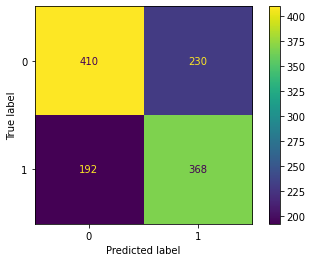


Accuracy: 0.65

Micro Precision: 0.65
Micro Recall: 0.65
Micro F1-score: 0.65

Macro Precision: 0.65
Macro Recall: 0.65
Macro F1-score: 0.65

Weighted Precision: 0.65
Weighted Recall: 0.65
Weighted F1-score: 0.65

Classification Report

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       640
           1       0.62      0.66      0.64       560

    accuracy                           0.65      1200
   macro avg       0.65      0.65      0.65      1200
weighted avg       0.65      0.65      0.65      1200

best accuracy so far:

################Confusion Matrix####################


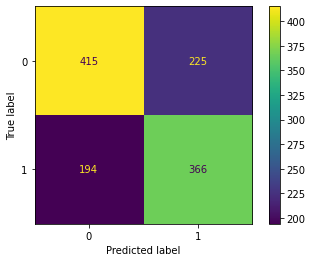


Accuracy: 0.65

Micro Precision: 0.65
Micro Recall: 0.65
Micro F1-score: 0.65

Macro Precision: 0.65
Macro Recall: 0.65
Macro F1-score: 0.65

Weighted Precision: 0.65
Weighted Recall: 0.65
Weighted F1-score: 0.65

Classification Report

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       640
           1       0.62      0.65      0.64       560

    accuracy                           0.65      1200
   macro avg       0.65      0.65      0.65      1200
weighted avg       0.65      0.65      0.65      1200

train loss 0.150, val loss 1.530, val accuracy 0.656, and val rmse 0.587
best accuracy so far:

################Confusion Matrix####################


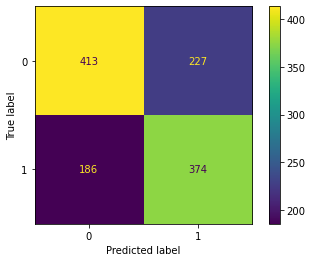


Accuracy: 0.66

Micro Precision: 0.66
Micro Recall: 0.66
Micro F1-score: 0.66

Macro Precision: 0.66
Macro Recall: 0.66
Macro F1-score: 0.66

Weighted Precision: 0.66
Weighted Recall: 0.66
Weighted F1-score: 0.66

Classification Report

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       640
           1       0.62      0.67      0.64       560

    accuracy                           0.66      1200
   macro avg       0.66      0.66      0.66      1200
weighted avg       0.66      0.66      0.66      1200

train loss 0.133, val loss 1.538, val accuracy 0.645, and val rmse 0.596


In [116]:
# import time
# import os
# import copy
# import shutil
# import torch.optim as optim
# from torch.optim import lr_scheduler

# model_ft = model_ft.to(device)

# criterion = nn.MultiMarginLoss()

# # Observe that all parameters are being optimized
# optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# #train_model(model, epochs=30, lr=0.1)
# model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
#                        num_epochs=25)

train_model(model, epochs=30, lr=0.1)
